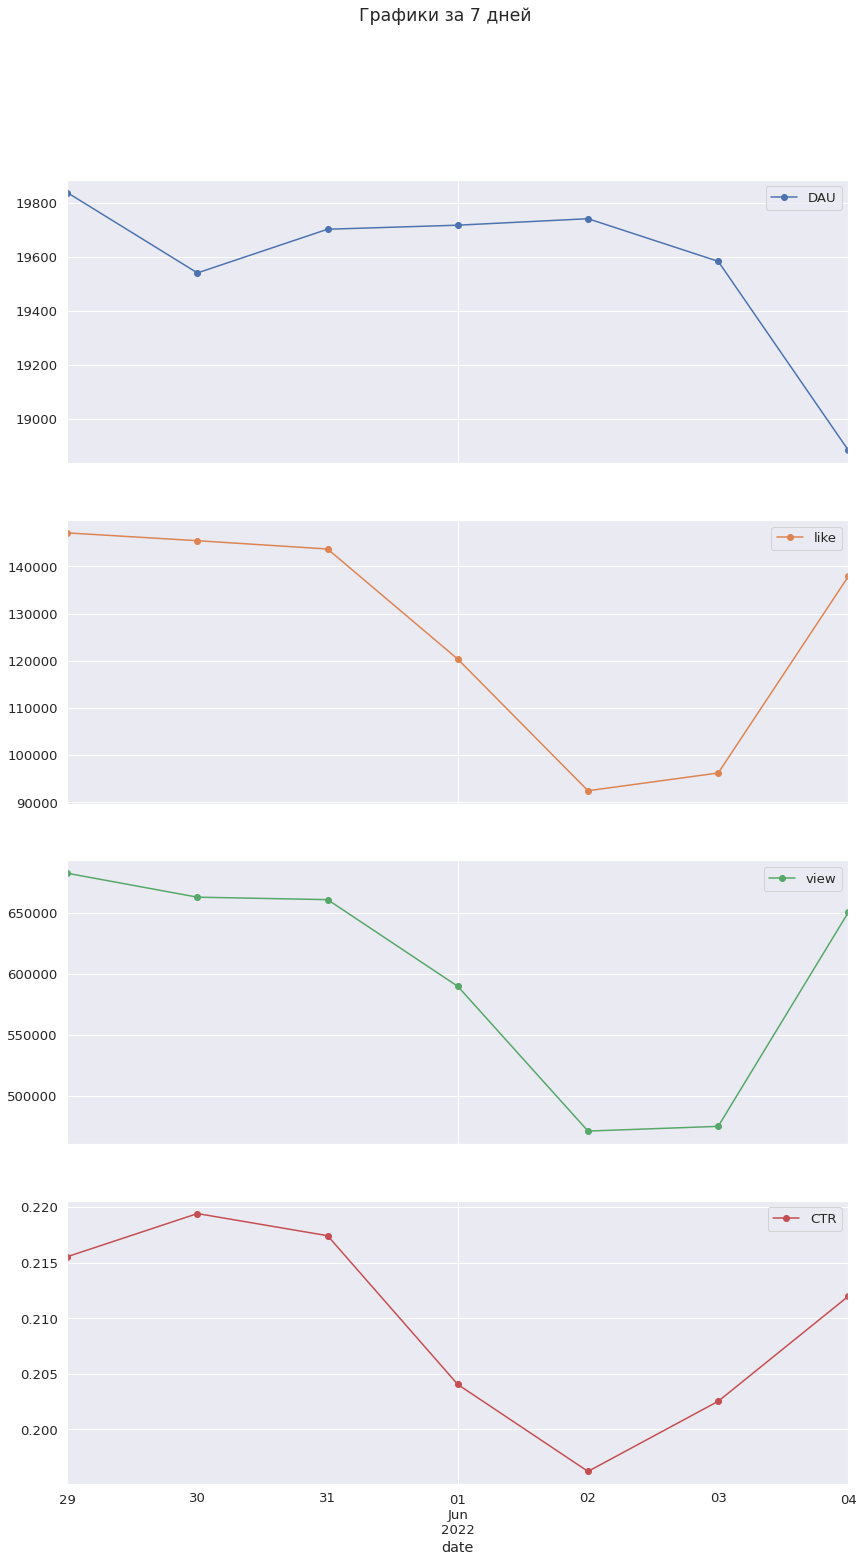

In [2]:
import telegram
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
from read_db.CH import Getch

sns.set(font_scale=1.2)

def feed_report(chat=None):
    chat_id = chat or 491009072
    bot = telegram.Bot(token='5332579519:AAFPJ9lJrVM32xiSwWfOT_U7f8ESsOd88Vk')
    
    feed = Getch('''SELECT 
            toStartOfDay(toDateTime(time)) as date,
            count(DISTINCT user_id) as DAU,
            countIf(user_id, action='like') as like,
            countIf(user_id, action='view') as view,
            countIf(user_id, action='like') / countIf(user_id, action='view') as CTR
        FROM simulator_20220520.feed_actions 
        where toDate(time) > yesterday() - interval 1 week and toDate(time) < today()
        GROUP BY date
        ORDER BY date desc''').df
    
    day = feed['date'][0].strftime('%Y-%m-%d')
    day_dau = feed['DAU'][0]
    day_like = feed['like'][0]
    day_view = feed['view'][0]
    day_CTR = round(feed['CTR'][0],4)
    nl = '\n'
    
    message = f"Лента новостей данные за {day}{nl} DAU: {day_dau}{nl} Просмотры: {day_view}{nl} Лайки: {day_like}{nl} CTR:{day_CTR}{nl}"
    # bot.sendMessage(chat_id=chat_id, text=message)
    
    feed.plot(x="date", subplots=True, figsize=(14, 24), marker= 'o', markersize=6, title='Графики за 7 дней')
    
    plot_object = io.BytesIO()  
    plt.savefig(plot_object)     
    plot_object.name = 'feed_report.png' 
    plot_object.seek(0) 
    plt.close
    bot.sendPhoto(chat_id=chat_id, photo=plot_object, caption=message)
    
    
try:
    feed_report()
except Exception as e:
    print(e)